In [1]:
! [ -e /content ] && pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz


In [2]:
import os
import pandas as pd
from fastbook import *
from fastai.tabular.all import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import *
import sklearn

def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

traindf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/train.csv',low_memory=False)
testdf = pd.read_csv('/mnt/c/Users/jsult/Desktop/spacetitanic3/test.csv',low_memory= False)
newtraindf = pd.read_csv('/mnt/c/users/jsult/desktop/spacetitanic3/imputation/finalimpute/newtrainer.csv',low_memory= False)





/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastbook/__init__.py:11: UserWarning: Missing `ipywidgets` - please install it
  except ModuleNotFoundError: warn("Missing `ipywidgets` - please install it")
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastbook/__init__.py:13: UserWarning: Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`
  except ModuleNotFoundError: warn("Missing `sentencepiece` - please run `pip install 'sentencepiece<0.1.90'`")


In [3]:

traindf.dropna(inplace = True)
newtraindf.dropna(inplace = True)

In [4]:
len(traindf)

6606

In [5]:
len(newtraindf)

7309

In [6]:
newtraindf.drop(columns = ['Train','Spending','Group','GroupNumber','FirstName','LastName','CabinDeck','CabinSide','CabinNum'],inplace = True)

In [7]:
len(traindf.columns) == len(newtraindf.columns)

True

In [8]:
nas = list(testdf.isna().sum(axis = 1))
indexes = list(testdf.index)
keepinds = []
dropinds = []
for i in range(len(indexes)):
    if nas[i] == 0:
        keepinds.append(i)
    else:
        dropinds.append(i)

droptest = testdf.loc[dropinds].copy()
testdf = testdf.loc[keepinds].copy()


In [9]:
len(testdf)

3281

/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/pyth

decision tree prediction 0.79333838001514


/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/pyth

decision tree prediction 0.7878165639972622


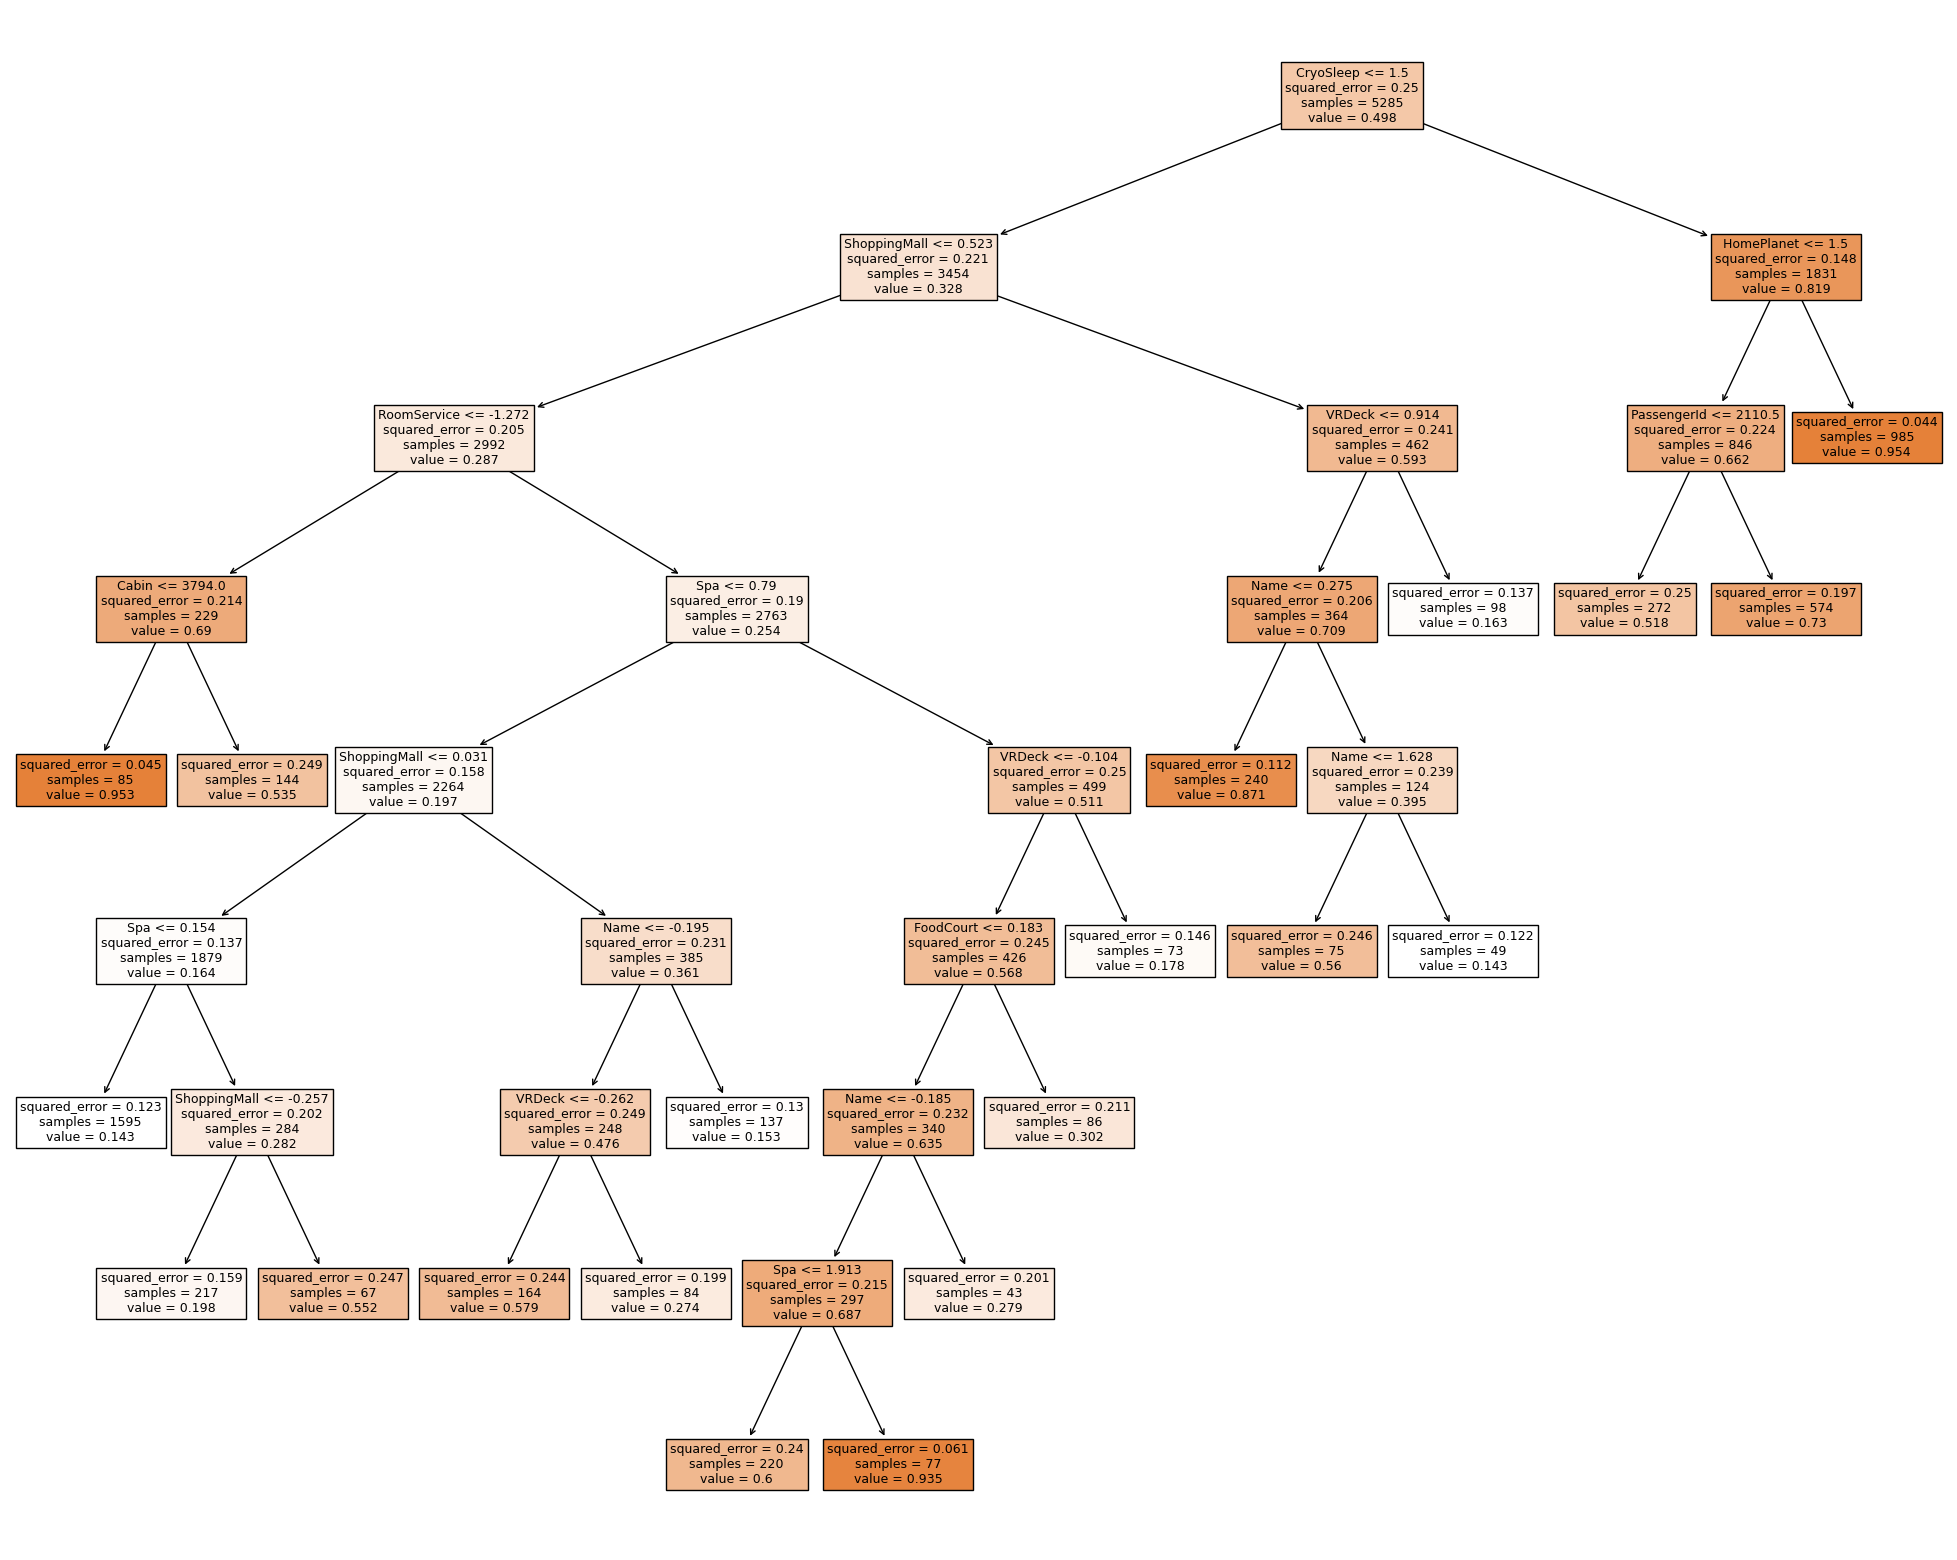

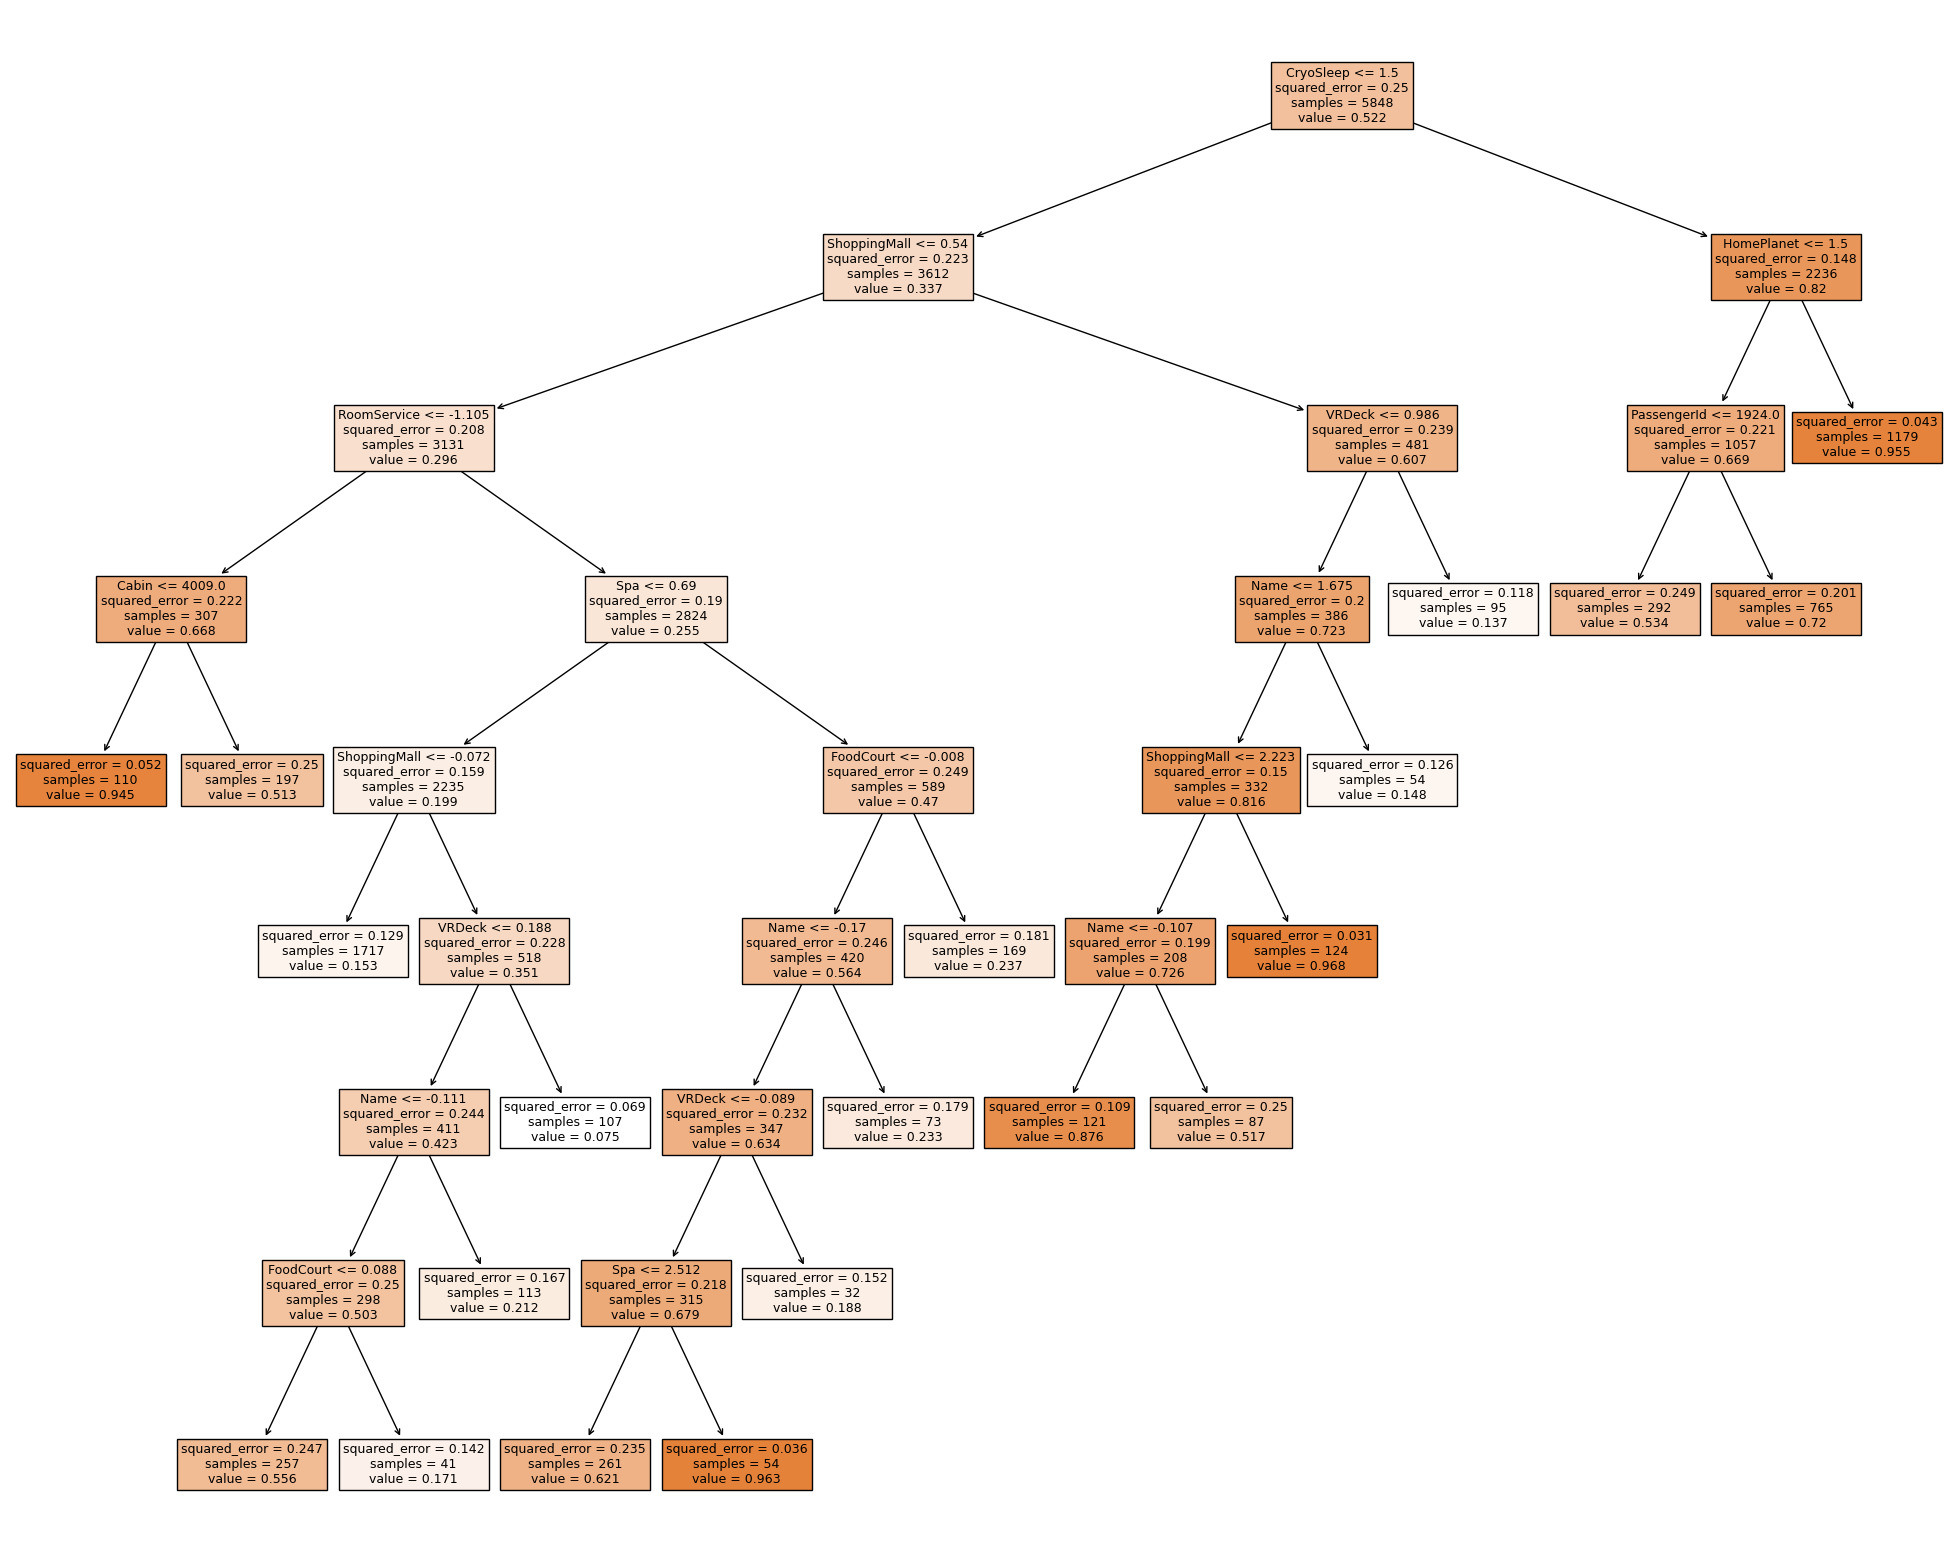

In [10]:
def treestuff(df):
    splits = RandomSplitter(seed = 1)(range_of(df))
    dep_var = 'Transported'
    procs = [Categorify,Normalize]
    cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
    to = TabularPandas(df, procs, cat, cont, y_names=dep_var,splits = splits)

    xs,y = to.train.xs,to.train.y
    valid_xs, valid_y = to.valid.xs, to.valid.y

    m = DecisionTreeRegressor(max_leaf_nodes=20)
    m.fit(xs, y)

    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(m,
                    feature_names= df.columns,
                    filled=True)
    print('decision tree prediction',((m.predict(valid_xs) > 0.5) == valid_y).sum() / len(valid_y))
    return m,xs,y,valid_xs,valid_y,to

traintree,trainxs,trainy,validxs,validy,trainto = treestuff(traindf)
newtraintree,newtrainxs,newtrainy,newvalidxs,newvalidy,newtrainto = treestuff(newtraindf)


In [38]:
newwtraindf = newtraindf.drop(columns = ['PassengerId','Name','Cabin'])

In [39]:
newwtraindf

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8686,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True


In [62]:
def treestuff(df):
    splits = RandomSplitter(seed = 1)(range_of(df))
    dep_var = 'Transported'
    procs = [Categorify,Normalize]
    cont,cat = cont_cat_split(df, 1, dep_var=dep_var)
    to = TabularPandas(df, procs, cat, cont, y_names=dep_var,splits = splits)

    xs,y = to.train.xs,to.train.y
    valid_xs, valid_y = to.valid.xs, to.valid.y

    m = DecisionTreeRegressor(max_leaf_nodes=20)
    m.fit(xs, y)

    return m,xs,y,valid_xs,valid_y,to

traintree,trainxs,trainy,validxs,validy,trainto = treestuff(traindf)
newtraintree,newtrainxs,newtrainy,newvalidxs,newvalidy,newtrainto = treestuff(newtraindf)
newwtraintree,newwtrainxs,newwtrainy,newwvalidxs,newwvalidy,newwtrainto = treestuff(newwtraindf)


/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/data/transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/pyth

In [60]:
newwtraindf = newwtraindf.astype({'HomePlanet':'category','CryoSleep' : 'bool','Destination':'category','Transported':'category','VIP' : 'bool',})

In [61]:
newwtraindf.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [59]:
newwtraindf.Age

0       39.0
1       24.0
2       58.0
3       33.0
4       16.0
        ... 
8686    32.0
8688    41.0
8689    18.0
8690    26.0
8691    32.0
Name: Age, Length: 7309, dtype: float64

In [65]:
dls = newwtrainto.dataloaders(bs=128)
dls.show_batch()
learn = tabular_learner(dls, metrics=accuracy)


,HomePlanet,CryoSleep,Destination,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,True,TRAPPIST-1e,False,2.200000e+01,-0.000009,-0.000016,-0.000004,-0.000006,-0.000015,True
1,Mars,False,TRAPPIST-1e,True,4.500000e+01,1093.000020,949.999984,340.999997,-0.000006,-0.000015,False
2,Earth,False,TRAPPIST-1e,False,2.200000e+01,-0.000009,3.000009,485.999972,-0.000006,227.999999,True
3,Mars,False,TRAPPIST-1e,False,2.500000e+01,1733.999887,0.999992,189.000000,1.000005,-0.000015,False
4,Europa,True,TRAPPIST-1e,False,1.700000e+01,-0.000009,-0.000016,-0.000004,-0.000006,-0.000015,True
5,Europa,False,55 Cancri e,False,2.900000e+01,-0.000009,433.000000,4898.999771,393.000001,260.000000,True
6,Earth,False,TRAPPIST-1e,False,2.400000e+01,552.000001,0.999992,-0.000004,230.999999,-0.000015,True
7,Mars,False,TRAPPIST-1e,False,2.600000e+01,1332.999969,-0.000016,50.000000,-0.000006,-0.000015,False
8,Earth,False,TRAPPIST-1e,False,3.800000e+01,-0.000009,847.000003,2.999998,34.000007,-0.000015,False
9,Mars,False,55 Cancri e,False,8.535281e-07,-0.000009,-0.000016,-0.000004,-0.000006,-0.000015,True


In [67]:

learn.fit_one_cycle(3)


epoch,train_loss,valid_loss,accuracy,time
0,0.448488,0.455149,0.791923,00:12
1,0.449853,0.453900,0.770021,00:12
2,0.441391,0.440618,0.791239,00:12


In [31]:
dls = newwtrainto.dataloaders(bs=128)
dls.show_batch()
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)


,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,C/79/S,TRAPPIST-1e,False,Giedia Seadler,3.000000e+01,63.000005,9314.000200,248.999996,2624.000090,4537.999989,False
1,Earth,False,G/37/P,TRAPPIST-1e,False,Wena Wilsoney,8.535281e-07,-0.000009,-0.000016,-0.000004,-0.000006,-0.000015,True
2,Earth,False,E/245/S,TRAPPIST-1e,False,Vin Daughttley,2.400000e+01,2.999999,2052.999980,334.999993,-0.000006,4.000005,True
3,Europa,False,C/58/S,TRAPPIST-1e,False,Marin Supiensive,2.600000e+01,0.999993,230.000005,-0.000004,41.999993,4030.000076,False
4,Earth,False,G/22/P,TRAPPIST-1e,False,Gory Atkinney,2.200000e+01,4119.000161,-0.000016,-0.000004,-0.000006,60.999994,False
5,Earth,False,F/1060/P,TRAPPIST-1e,False,Melara Daughtson,2.100000e+01,1960.999952,96.000002,-0.000004,54.000004,40.000004,False
6,Earth,True,G/30/P,PSO J318.5-22,False,Jeroy Cookson,5.200000e+01,-0.000009,-0.000016,-0.000004,-0.000006,-0.000015,True
7,Europa,False,D/68/P,TRAPPIST-1e,False,Elebara Pleele,5.900000e+01,-0.000009,2209.999961,-0.000004,4084.999967,11.000007,False
8,Earth,True,G/442/P,PSO J318.5-22,False,Heryle Daughessey,3.800000e+01,-0.000009,-0.000016,-0.000004,-0.000006,-0.000015,True
9,Europa,False,D/57/S,TRAPPIST-1e,False,Neutrin Crakenecal,3.700000e+01,-0.000009,1335.999978,2.000008,11.999989,6.999987,True


epoch,train_loss,valid_loss,accuracy,time
0,0.521477,0.559957,0.778234,00:12
1,0.272251,0.514688,0.763860,00:13
2,0.120490,0.557570,0.741273,00:14


In [12]:
dls = trainto.dataloaders(bs=64)
dls.show_batch()
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1710_01,Earth,True,G/276/P,PSO J318.5-22,False,Andrey Mcgowaymond,20.000000,8.993593e-07,-0.000012,0.000001,-0.000003,-0.000007,True
1,6305_02,Europa,False,B/248/S,TRAPPIST-1e,False,Ashird Parbleake,45.999999,3.616000e+03,564.000001,0.000001,15.000005,3303.000010,False
2,0252_01,Earth,False,F/53/P,TRAPPIST-1e,False,Leenny Byerry,30.000000,3.350000e+02,694.999996,541.000003,-0.000003,-0.000007,False
3,2790_02,Europa,False,B/86/P,55 Cancri e,False,Cheliak Simous,41.000000,8.993593e-07,320.000003,4332.999953,1312.999944,50.999999,False
4,1770_01,Europa,True,B/75/S,55 Cancri e,False,Tauxon Wincer,15.000000,8.993593e-07,-0.000012,0.000001,-0.000003,-0.000007,True
5,7751_01,Europa,True,C/252/P,55 Cancri e,False,Mesatik Retefule,41.000000,8.993593e-07,-0.000012,0.000001,-0.000003,-0.000007,True
6,5923_01,Mars,True,F/1129/S,55 Cancri e,False,Oafron Batte,30.000000,8.993593e-07,-0.000012,0.000001,-0.000003,-0.000007,True
7,6861_01,Earth,True,G/1114/S,PSO J318.5-22,False,Iney Lambucketty,15.000000,8.993593e-07,-0.000012,0.000001,-0.000003,-0.000007,True
8,0839_01,Europa,False,B/30/S,TRAPPIST-1e,False,Grumak Pokerheed,32.000000,8.993593e-07,179.000001,0.000001,-0.000003,5152.000363,False
9,6422_03,Mars,False,F/1330/P,TRAPPIST-1e,False,Tote Peake,23.000000,1.233000e+03,-0.000012,527.000002,-0.000003,-0.000007,False


epoch,train_loss,valid_loss,accuracy,time
0,0.509347,0.502012,0.721423,00:24
1,0.206896,0.511713,0.767600,00:28
2,0.076615,0.489701,0.789553,00:25


In [11]:
def rfclassifier(tree,xs,y,valid_xs,valid_y):
    m = RandomForestClassifier(n_estimators= 100, max_leaf_nodes= 50, min_samples_leaf = 20)
    m.fit(xs, y)
    preds = m.predict(valid_xs)
    print("mae",mean_absolute_error(valid_y, preds))
    print('preds', (preds == valid_y).sum() /len(valid_y))
    return m
trainforest = rfclassifier(traintree,trainxs,trainy,validxs,validy)
newtrainforest = rfclassifier(newtraintree,newtrainxs,newtrainy,newvalidxs,newvalidy)


mae 0.20060560181680545
preds 0.7993943981831946
mae 0.21149897330595482
preds 0.7885010266940452


In [12]:
#hide
import warnings
warnings.simplefilter('ignore', FutureWarning)

from waterfall_chart import plot as waterfall

ModuleNotFoundError: No module named 'waterfall_chart'

In [17]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(trainforest, trainxs)
print(fi[:30])

fi = rf_feat_importance(newtrainforest, newtrainxs)
print(fi[:30])


            cols       imp
2      CryoSleep  0.215350
11           Spa  0.145811
8    RoomService  0.132266
12        VRDeck  0.121675
9      FoodCourt  0.093864
10  ShoppingMall  0.078820
3          Cabin  0.074354
1     HomePlanet  0.051397
7            Age  0.034658
0    PassengerId  0.023530
6           Name  0.016334
4    Destination  0.011744
5            VIP  0.000198
            cols       imp
2      CryoSleep  0.207640
11           Spa  0.161004
8    RoomService  0.131019
12        VRDeck  0.117372
9      FoodCourt  0.094265
3          Cabin  0.076091
10  ShoppingMall  0.075639
1     HomePlanet  0.053632
7            Age  0.033363
0    PassengerId  0.024695
6           Name  0.014952
4    Destination  0.010234
5            VIP  0.000093


In [18]:
def test(testdf,forest,name,to):
    
    to_new = to.train.new(testdf)
    to_new.process()
    print(list(forest.predict(to_new.xs)))



    testtran = [True if x == 1 else False for x in list(forest.predict(to_new.xs))]
    print(testtran)
    testdf['Transported'] = testtran

    droptest['Transported'] = False
    result = pd.concat([droptest,testdf])
    result = result.sort_index()
    ret = result[['PassengerId','Transported']]
    filename = name + ".csv"
    ret.to_csv(filename,index=False)

test(testdf,trainforest,'submitnoimpute',trainto)
test(testdf,newtrainforest,'submitimpute',newtrainto)

[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 

/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3

[True, False, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, True, False, True, False, False, False, True, True, False, True, False, True, False, True, True, False, True, False, False, True, True, False, True, False, False, False, True, False, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, False, False, False, True, False, True, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, True, True, False, False, True, False, False, True, False, False, False, True, False, True, False, True, True, False, False, True, True, False, False, False, True, True, True, False, True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, True, False, False, False, False, False, True, 

/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3.11/site-packages/fastai/tabular/core.py:233: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/jakeunix/miniforge3/envs/sptitanic/lib/python3

[True, False, True, True, True, True, True, True, True, False, True, True, False, False, True, True, True, True, False, False, True, True, True, True, True, False, True, True, False, False, True, True, False, True, False, True, False, True, False, False, False, True, True, False, True, True, True, False, True, True, False, True, False, False, True, True, False, True, False, False, False, True, False, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, False, False, False, True, False, False, True, True, False, True, True, True, False, True, True, False, True, True, True, True, False, False, False, False, False, False, True, True, False, False, True, False, True, True, False, False, False, True, False, True, False, True, True, False, False, True, True, False, False, False, True, True, True, False, True, False, False, True, True, True, False, True, False, False, True, False, True, True, True, True, False, False, False, False, False, True, F

In [19]:
imp = pd.read_csv('submitimpute.csv')
nimp = pd.read_csv('submitnoimpute.csv')

(nimp.Transported == imp.Transported).sum()

4230

In [20]:
4222/4277

0.9871405190554127